In [ ]:
import numpy as np
import nltk
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression as LGR
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#question1

In [ ]:
# the csv file has uploaded in my google Drive
imdb_data = 'https://drive.google.com/file/d/1PBHHY7ONen99StSn43SwfIJDx0Bt_LMD/view?usp=sharing'
id_of_imdb_data = imdb_data.split("/")[-2]

path_imdb_data = f'https://drive.google.com/uc?id={id_of_imdb_data}'
df = pd.read_csv(path_imdb_data)

In [ ]:
print(df.head())
print(df.tail())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                                  review sentiment
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative


In [ ]:
vectorizing = CountVectorizer(stop_words='english')
X = vectorizing.fit_transform(df['review'])
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [ ]:
#Used an 80-20 split for my data, that is,80% of the data will be for training and 20% of the data will be for testing

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Logistic Regression

lr = LGR()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

In [ ]:
logistic_Regression_accuracy = accuracy_score(y_test, lr_prediction)
print(f"Logistic Regression Classification Report:\n")
print(classification_report(y_test, lr_prediction))
print("################################################")
print()
print(f"Accuracy of logistic Regression : {logistic_Regression_accuracy}")


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.89      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

################################################

Accuracy of logistic Regression : 0.8841


In [ ]:
# Naive Bayes started from here

In [ ]:
#nb = Naive Bayes

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_prediction = nb.predict(X_test)

In [ ]:
Naive_Bayes_Accuracy = accuracy_score(y_test, nb_prediction)

In [ ]:
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_prediction))
print("################################################")
print()
print(f"Accuracy of Naive Bayes Model: {Naive_Bayes_Accuracy}")


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4961
           1       0.87      0.84      0.85      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

################################################

Accuracy of Naive Bayes Model: 0.8566


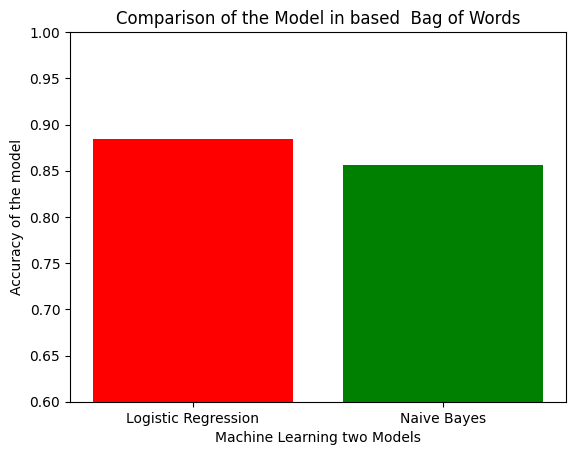

In [ ]:
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [logistic_Regression_accuracy, Naive_Bayes_Accuracy]

plt.bar(models, accuracies, color=['red', 'green'])
plt.xlabel('Machine Learning two Models')
plt.ylabel('Accuracy of the model')
plt.title('Comparison of the Model in based  Bag of Words')
plt.ylim(0.6, 1.0)
plt.show()

Explatnation:
Based on the results, Logistic Regression outperforms the Naive Bayes model
in terms of both accuracy (88.41% vs. 85.66%) and F1 score (0.88 vs. 0.86).
The higher F1 score indicates that Logistic Regression provides a better balance between
precision and recall, making it the more effective model for this classification task.**bold text**

# Question 2

In [ ]:
TfIDF_vectorize = TfidfVectorizer(stop_words='english')
X_tfidf = TfIDF_vectorize.fit_transform(df['review'])

In [ ]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Logistic Regression


In [ ]:
lr_TFIDF = LGR()
lr_TFIDF.fit(X_train_tfidf, y_train)
lr_predictions_TFIDF = lr_TFIDF.predict(X_test_tfidf)

In [ ]:
lr_accuracy_TFIDF = accuracy_score(y_test, lr_predictions_TFIDF)

In [ ]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions_TFIDF))
print("################################################")
print()
print(f"Accuracy of Logistic Regression: {lr_accuracy_TFIDF}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

################################################

Accuracy of Logistic Regression: 0.894


# Naive Bayes

In [ ]:
nb_model_TFIDF = MultinomialNB()
nb_model_TFIDF.fit(X_train_tfidf, y_train)
nb_predictions_TFIDF = nb_model_TFIDF.predict(X_test_tfidf)

In [ ]:
nb_accuracy_TFIDF = accuracy_score(y_test, nb_predictions_TFIDF)

In [ ]:
print("Naive Bayes Classification Report:\n")
print(classification_report(y_test, nb_predictions_TFIDF))
print("################################################")
print()
print(f"Accuracy of Naive Bayes: {nb_accuracy_TFIDF}")

Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4961
           1       0.88      0.85      0.86      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

################################################

Accuracy of Naive Bayes: 0.8654


# Visualization

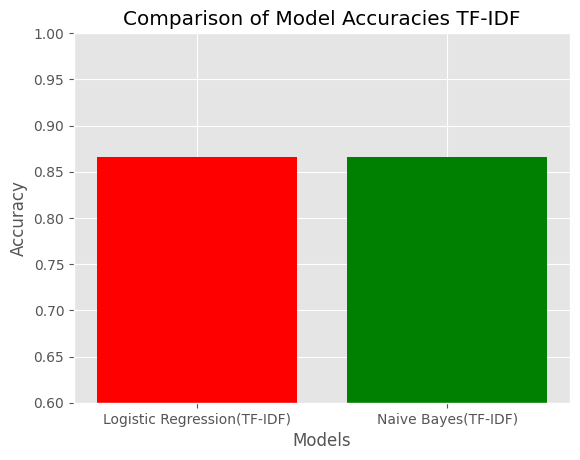

In [ ]:
models = ['Logistic Regression(TF-IDF)', 'Naive Bayes(TF-IDF)']
accuracies = [nb_accuracy_TFIDF, nb_accuracy_TFIDF]

plt.bar(models, accuracies, color=['red', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies TF-IDF')
plt.ylim(0.6, 1.0)
plt.show()

The evaluation metrics show that TF-IDF outperforms Bag-of-Words for feature representation. Logistic Regression achieved higher accuracy (89.4%) and F1 scores compared to Naive Bayes (86.54%), making it the better model overall. This demonstrates Logistic Regression's superior ability to capture the data patterns effectively.

Question3

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
# Extracting reviews and converting labels to binary values
reviews_text = df['review'].values
sentiment_labels = df['sentiment'].apply(lambda sentiment: 1 if sentiment == 'positive' else 0).values

# Tokenization and sequence preparation
maximum_vocabulary_size = 10000
maximum_sequence_length = 200
tokenizer = Tokenizer(num_words=maximum_vocabulary_size, oov_token="<OOV>")
tokenizer.fit_on_texts(reviews_text)
tokenized_sequences = tokenizer.texts_to_sequences(reviews_text)
padded_review_sequences = pad_sequences(tokenized_sequences,
                                         maxlen=maximum_sequence_length,
                                         padding='post',
                                         truncating='post')

# Loading pre-trained GloVe embeddings
embedding_dimensions = 100
glove_embedding_file = "glove.6B.100d.txt"
pretrained_embeddings_index = {}

with open(glove_embedding_file, 'r', encoding='utf-8') as glove_file:
    for line in glove_file:
        values = line.split()
        word = values[0]
        embedding_coefficients = np.asarray(values[1:], dtype='float32')
        pretrained_embeddings_index[word] = embedding_coefficients

# Preparing embedding matrix
word_to_index = tokenizer.word_index
number_of_tokens = min(maximum_vocabulary_size, len(word_to_index) + 1)
embedding_matrix = np.zeros((number_of_tokens, embedding_dimensions))

for word, index in word_to_index.items():
    if index < maximum_vocabulary_size:
        embedding_vector = pretrained_embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_labels, y_test_labels = train_test_split(
    padded_review_sequences, sentiment_labels, test_size=0.2, random_state=42
)


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Dense, Flatten

# Defining the Sequential Model
sentiment_classification_model = Sequential([
    Embedding(input_dim=number_of_tokens,
              output_dim=embedding_dimensions,
              weights=[embedding_matrix],
              input_length=maximum_sequence_length,
              trainable=False),  # Pre-trained embeddings are frozen
    Dense(10, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compiling the Model
sentiment_classification_model.compile(optimizer='adam',
                                       loss='binary_crossentropy',
                                       metrics=['accuracy'])

# Training the Model
batch_size = 128
num_epochs = 50
training_history = sentiment_classification_model.fit(
    X_train_data, y_train_labels,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test_data, y_test_labels),
    verbose=1
)

# Evaluating Model on Test Data
_, test_accuracy = sentiment_classification_model.evaluate(X_test_data, y_test_labels, verbose=0)
print(f"Shallow RNN Test Accuracy: {test_accuracy:.2f}")

# Making Predictions and Evaluating Accuracy
from sklearn.metrics import accuracy_score
predicted_labels = (sentiment_classification_model.predict(X_test_data) > 0.5).astype("int32")
classification_accuracy = accuracy_score(y_test_labels, predicted_labels)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5873 - loss: 0.6614 - val_accuracy: 0.7597 - val_loss: 0.5101
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7739 - loss: 0.4848 - val_accuracy: 0.7910 - val_loss: 0.4549
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8075 - loss: 0.4303 - val_accuracy: 0.8005 - val_loss: 0.4343
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8170 - loss: 0.4077 - val_accuracy: 0.8072 - val_loss: 0.4243
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8241 - loss: 0.3953 - val_accuracy: 0.8126 - val_loss: 0.4167
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8322 - loss: 0.3866 - val_accuracy: 0.8140 - val_loss: 0.4145
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8324 - loss: 0.3789 - val_accuracy: 0.8113 - val_loss: 0.4164
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8340 - loss: 0.3758 - val_acc

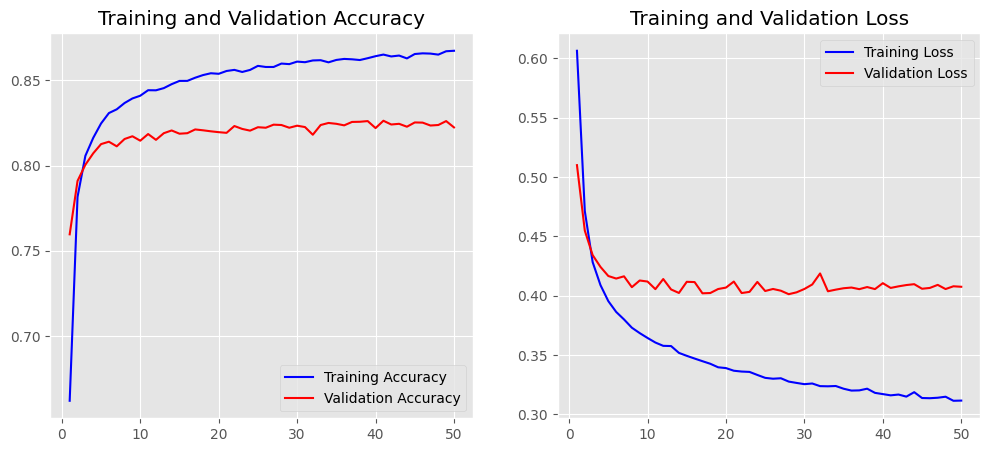

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_training_history(training_history):
    training_accuracy = training_history.history['accuracy']
    validation_accuracy = training_history.history['val_accuracy']
    training_loss = training_history.history['loss']
    validation_loss = training_history.history['val_loss']
    epochs_range = range(1, len(training_accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, training_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs_range, validation_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, training_loss, 'b', label='Training Loss')
    plt.plot(epochs_range, validation_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

# Plotting the Training and Validation Metrics
plot_training_history(training_history)


In [ ]:
# Displaying the Model Summary
sentiment_classification_model.summary()

# Evaluating Training and Testing Accuracy
training_loss, training_accuracy = sentiment_classification_model.evaluate(X_train_data, y_train_labels, verbose=False)
print("Training Accuracy: {:.4f}".format(training_accuracy))

testing_loss, testing_accuracy = sentiment_classification_model.evaluate(X_test_data, y_test_labels, verbose=False)
print("Testing Accuracy:  {:.4f}".format(testing_accuracy))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200, 10)             │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           2,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,009,035 (3.85 MB)

 Trainable params: 3,011 (11.76 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

 Optimizer params: 6,024 (23.54 KB)

Training Accuracy: 0.8723
Testing Accuracy:  0.8224



Explanation: The model consists of an embedding layer with pre-trained GloVe embeddings (1,000,000 non-trainable parameters) followed by two dense layers for classification. It achieved a training accuracy of 87.23% and a testing accuracy of 82.24%. This indicates good generalization but leaves room for improvement in test performance.